# Part 1: The Python Reddit API Wrapper (PRAW) - Installation, setup and scraping

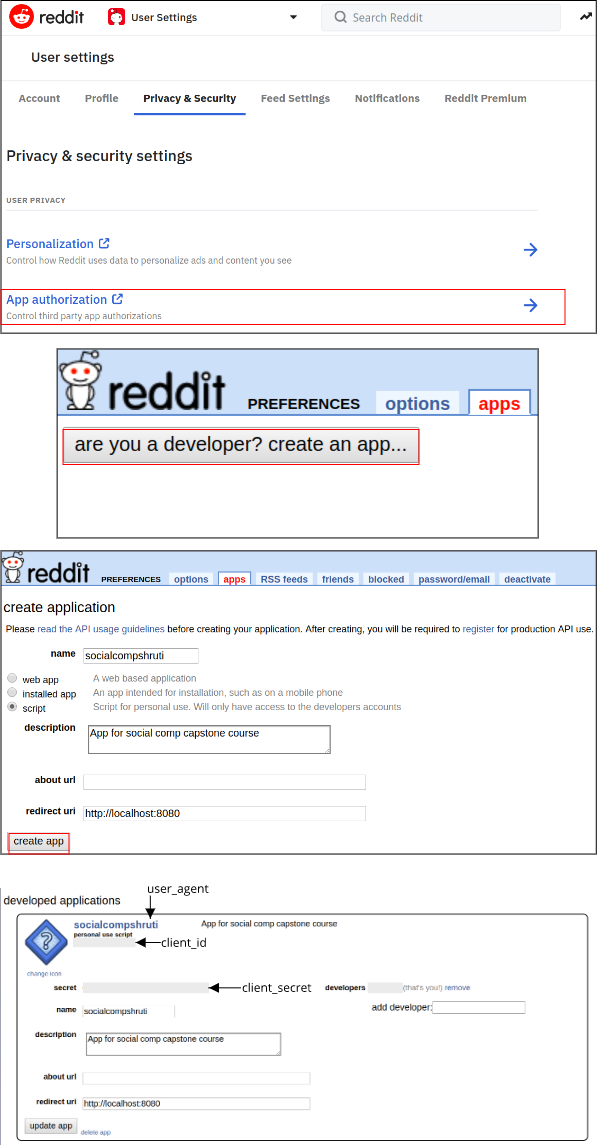

In [1]:
from IPython.display import Image
Image(filename='Reddit setup.png')


## Install praw

pip install praw

(more info https://praw.readthedocs.io/en/latest/getting_started/installation.html)

## Setup Reddit app and get keys 

## Create "praw.ini" file to save the application information in the following format
### (Do not share this file with anyone and keep it in the same directory as your other Reddit scripts)

## Check if everything is working by running the following code that creates Reddit instance 

In [1]:
from os.path import isfile
import praw
import pandas as pd
from time import sleep
# Get credentials from DEFAULT instance in praw.ini
reddit = praw.Reddit('DEFAULT')

## Subreddit related scraping 

In [2]:
# Create subreddit variable like this 
# Pick any subreddit like (news, pics, science, technology, politics) or pick any other you want
subreddit = reddit.subreddit('news')

# Get top posts by ".top" (you can also do .hot, .new, .controversial and .gilded) and put limit
# This creates iterator item which we can use to parse posts individually
top_subreddit = subreddit.top(limit=100)

#Print titles and id of posts by over the top_subreddit object
for submission in subreddit.top(limit=5):
    print(submission.title, submission.id)

Scientist Stephen Hawking has died aged 76 84aebi
F.C.C. Announces Plan to Repeal Net Neutrality 7ej943
Report: Stan Lee dead at 95 - Story 9wgrdf
Arizona Senator John McCain has passed away at the age of 81 9abi3e
Apple admits it slows older iPhones, confirming Geekbench report 7l4s0r


###### Apart from "title" and "id" what else can you find out about the "submission" object?

In [ ]:
Upvotes

### Creating pandas frames from subreddit related data 

In [3]:
# You can scrape different characteristics of posts (refer to Reddit API documentation to see what options are available)
# Here we will scrape title, score, url, id, number of comments, UTC timestamp and body text
# We will store it in a dictionary
from collections import defaultdict
posts_dict = defaultdict(list)

# 1. Create a disctionary structure to store all such fields
#posts_dict = { "title":[],"score":[], "id":[], "url":[], "comms_num": [], "created": [], "body":[]}


# 2. Now iterate over the top_subreddit object and store fields for each post in the disctionary
for submission in top_subreddit:
    posts_dict["title"].append(submission.title)
    posts_dict["score"].append(submission.score)
    posts_dict["id"].append(submission.id)
    posts_dict["url"].append(submission.url)
    posts_dict["comms_num"].append(submission.num_comments)
    posts_dict["created"].append(str(submission.created).strip('.0')) #avoid storing data in scientific format
    posts_dict["body"].append(submission.selftext)

In [6]:
# Create a dataframe from a dictionary
news_data = pd.DataFrame(posts_dict)
# Print 
news_data.head()

,title,score,id,url,comms_num,created,body
0,Scientist Stephen Hawking has died aged 76,188179,84aebi,http://news.sky.com/story/scientist-stephen-ha...,6997,1521027928,
1,F.C.C. Announces Plan to Repeal Net Neutrality,177997,7ej943,https://www.nytimes.com/2017/11/21/technology/...,10950,1511312193,
2,Report: Stan Lee dead at 95 - Story,155165,9wgrdf,http://www.fox46charlotte.com/news/report-stan...,6487,1542077284,
3,Arizona Senator John McCain has passed away at...,154723,9abi3e,https://www.abc15.com/news/state/arizona-senat...,11786,1535271678,
4,"Apple admits it slows older iPhones, confirmin...",149911,7l4s0r,https://www.cnet.com/news/apple-iphone-6-6s-7-...,13282,1513835953,


In [7]:
# Save data to CSV
news_data.to_csv('./top_100_posts_in_news.csv', encoding='utf-8')

## Get user profile info (example user- u/karmanaut) 

In [8]:
# Get user object
user = reddit.redditor("karmanaut")

In [10]:
# Get user id
print(user.id)

# Know if user has verified email
print(user.has_verified_email)

#know the username (if you created the user instance with user-id instead of username)
print(user.name)

3ev2p
True
karmanaut


###### Apart from "name" , "has_verified_email" and "id" what else can you find out about the "user" object?

NameError: name 'Subreddit' is not defined

## Get user comments info 

In [13]:
# Create user comment disctionaty to store attributes of top comments made by the user
ucomm_dict = defaultdict(list)
#ucomm_dict = { "subreddit":[],"score":[], "id":[], "body":[]}

# Iterate over user comment object and store in dictionary 
for comment in user.comments.top(limit=50):
    ucomm_dict['subreddit'].append(comment.subreddit)
    ucomm_dict['score'].append(comment.score)
    ucomm_dict['id'].append(comment.id)
    ucomm_dict['body'].append(comment.body)

In [14]:
# Create a dataframe from a dictionary

ucomm_data = pd.DataFrame(ucomm_dict)
ucomm_data.head()

,subreddit,score,id,body
0,announcements,22893,d4bu28o,"Hey Spez,\n\nI'd like to propose an *alternati..."
1,announcements,16925,dv82zl2,"Hi Spez,\n\nI was a moderator around Reddit fo..."
2,OutOfTheLoop,6291,csq204d,"Today, we learned that Victoria was unexpected..."
3,AskReddit,3847,cl35giw,We had an [AMA from a North Korean defector](h...
4,AskReddit,3791,ckvk8sx,"Adolph Hitler's remaining relatives (nephews, ..."


In [15]:
# Save data to CSV
ucomm_data.to_csv("./user_comment_data.csv", encoding='utf-8')

###### We saw how to get top posts from a subreddit and top comments for a user. Can you figure out how to get comments from a subreddit and posts from a user? 

# Part 2: About pushhift 

### Download file from pushhift 

In [17]:
# We are going to query file directly from the python code. 
# There are several ways of doing this, we will use urllib
import urllib

# Go to "https://files.pushshift.io/reddit/comments/" all comment files are listed. 
# A url for comment file can be obtained by appending filename to the main url. For example, 
# Reddit comment file for Feb 2006 - https://files.pushshift.io/reddit/comments/RC_2006-02.bz2

# Retreive the file using the comment file url 
urllib.request.urlretrieve('https://files.pushshift.io/reddit/comments/RC_2006-02.bz2', filename='./example_reddit_comments.bz2')

# Check if there is 'example_reddit_comments.bz2' in your current dictionary

('./example_reddit_comments.bz2', <http.client.HTTPMessage at 0x7f998c93cbe0>)

### Parsing "bz2" format file 

In [19]:
# We will need python bz2 and json module
import bz2, json

counter = 0
# read first 5 lines as json object and print. then stop
with bz2.BZ2File('./example_reddit_comments.bz2', "r") as fp:
    for line in fp:
        counter = counter +1
        if counter < 5:
            job = json.loads(line)
            print(job)
            print 
        else:
            break

{'created_utc': 1138752114, 'author_flair_css_class': None, 'score': 0, 'ups': 0, 'subreddit': 'reddit.com', 'stickied': False, 'link_id': 't3_15xh', 'subreddit_id': 't5_6', 'body': 'THAN the title suggests.  Whoops.', 'controversiality': 1, 'retrieved_on': 1473820870, 'distinguished': None, 'gilded': 0, 'id': 'c166b', 'edited': False, 'parent_id': 't3_15xh', 'author': 'gmcg', 'author_flair_text': None}
{'author_flair_text': None, 'author': 'joshuaknox', 'id': 'c166d', 'parent_id': 't3_15tx', 'edited': False, 'gilded': 0, 'retrieved_on': 1473820870, 'distinguished': None, 'controversiality': 0, 'body': "Thank you, willis3000.  This seems to be bunk:  self-discipline doesn't standard-deviation out well.  How do you measure it?   It, unlike IQ, is highly subjective, and non-controversial.  \r\n\r\nPerhaps more importantly, a two year study of eighth graders is just crap.   If they check back in in twenty years or so, this would perhaps have a shred of validity, but not a heck of a lot ha

In [20]:
# You can see 5 dictionary like lines printed above. 
# Each of the lines is a json field that can be parsed separately

# Read lines as json and print subreddit, author name, ups and score separately
counter = 0
with bz2.BZ2File('./example_reddit_comments.bz2', "r") as fp:
    for line in fp:
        counter = counter +1
        if counter < 5:
            job = json.loads(line)
            print("subreddit", job['subreddit'])
            print("author", job['author'])
            print("upvotes", job['ups'])
            print("score", job['score'])
            print() 
        else:
            break

subreddit reddit.com
author gmcg
upvotes 0
score 0

subreddit reddit.com
author joshuaknox
upvotes 2
score 2

subreddit reddit.com
author rah
upvotes -6
score -6

subreddit reddit.com
author rah
upvotes -4
score -4



###### Can you copy methods from Praw code and store different fields in dictionary? Read dictionary as pandas frame and save it in CSV 

In [23]:
dict = defaultdict(list)
with bz2.BZ2File('./example_reddit_comments.bz2', "r") as fp:
    for line in fp:
        counter = counter +1
        if counter < 5:
            job = json.loads(line)
            print("subreddit", job['subreddit'])
            print("author", job['author'])
            print("upvotes", job['ups'])
            print("score", job['score'])
            print() 
        else:
            break